# Toronto's newest vegan restaurant is set to open

## A.Introduction

### A.1. Background

Toronto is the largest city in Canada and probably one of the most diverse and vibrant cities in the globe. Investing in a vegan restaurant may not only be supported by an ethical or ecological argument but also by an economical one as well.  According to a recent study %8,5 of the Canadian population is intending do away with meat consumption[1]. In 2018, there were approximately 2,3 million Canadians following the vegetarian diet, majority of whom is living in British Columbia[2].  

The aim of this study is to guide the entrepreneurs where best to open a vegan restaurant around Toronto. In order to get a better glimpse, we'll get into characteristics of the neighborhoods where a vegan restaurant has been in business and try to find a pattern.  


### A.2. Data Description 

- Foursquare API has been used to get the locations of the vegan restaurants in Toronto [3].
- Toronto data portal has been used to get the boundaries of neighborhoods [4] as well as the neighborhood profiles in Toronto. 

### B. Methodology

- Shapely library has been used in order to determine whether a point (i.e. latitude and longitude) is within a given polygon (in this case a neighborhood). Geopy library is used to convert an address into latitude and longitude values and Folium library has been used in order to visualize the data.  

In [5]:
import requests
import pandas as pd 
import numpy as np 
import random 
import json
from bs4 import BeautifulSoup
import geojson
from shapely import geometry
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
!conda install shapely --yes
!conda install -c conda-forge geojson --yes
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Shapely installed')
print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/fermat4472/anaconda3

  added / updated specs:
    - shapely


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/fermat4472/anaconda3

  added / updated specs:
    - geojson


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Shapely installed
Folium installed
Libraries imported.


- Here I query the Foursquare API and wrangle the data in order to create our dataframe regarding the vegan restaurants in Toronto. 

In [7]:
CLIENT_ID = 'PF312ZKOBQ5YEQJ2KGW3IRM25UMKXBR5AH52L4OQ5UCKRLGH' # your Foursquare ID
CLIENT_SECRET = 'MHMB2PWJLGDSAAH1K3NKAF02MPLL2EANMWSKYNHQRUMZTNZJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print(latitude, longitude)
search_query = 'Vegan'
radius = 30000
    
url_area = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url_area).json()
venues = results['response']['venues']
dataframe = pd.json_normalize(venues)
#dataframe.head()

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
  
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(5)


,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,neighborhood,id
0,Vegan Bear,Vegetarian / Vegan Restaurant,43.657124,-79.380948,"[{'label': 'display', 'lat': 43.657124, 'lng':...",471,M5B 1R7,CA,Toronto,ON,Canada,"[Toronto ON M5B 1R7, Canada]",NaN,NaN,NaN,5cf43e6586f4cc0036861396
1,Vegan Bear,Vegetarian / Vegan Restaurant,43.657124,-79.380948,"[{'label': 'display', 'lat': 43.657124, 'lng':...",471,M5B 1R7,CA,Toronto,ON,Canada,"[Toronto ON M5B 1R7, Canada]",NaN,NaN,NaN,5cf43e873ba767002c95ce10
2,Losco Vegan,Vegetarian / Vegan Restaurant,43.650565,-79.383419,"[{'label': 'display', 'lat': 43.650565, 'lng':...",327,M5H 2G4,CA,Toronto,ON,Canada,"[Toronto ON M5H 2G4, Canada]",NaN,NaN,NaN,5dbb4a61d042bf000828671b
3,Through Being Cool Vegan Baking Co.,Bakery,43.658455,-79.442291,"[{'label': 'display', 'lat': 43.65845489468513...",4732,NaN,CA,Toronto,ON,Canada,"[1277 Bloor St. West (at Lansdowne Ave.), Toro...",1277 Bloor St. West,at Lansdowne Ave.,NaN,5249fa1e11d2ae4d13bfc0d8
4,The Vegan Extremist,Vegetarian / Vegan Restaurant,43.656422,-79.402617,"[{'label': 'display', 'lat': 43.656422, 'lng':...",1539,M5T 2M2,CA,Toronto,ON,Canada,"[Toronto ON M5T 2M2, Canada]",NaN,NaN,NaN,5c0965b36336be002ce9ec4f


- I indicated the neighborhoods of Toronto on a folium map using the neigborhood geojson file and then superimposed the locations of vegan restaurant which I've had queried from Foursquare API on top of it. Toronto city hall is marked with red dot while vegan restaurants are marked with green dots. 

In [8]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Toronto City Hall

# mark the boundaries of neighborhoods

geojson_neighbourhood = '/home/fermat4472/Downloads/Neighbourhoods.geojson'


folium.GeoJson(
    geojson_neighbourhood,
    name='geojson'
).add_to(venues_map)    


# add a red circle marker to represent the Toronto City Hall
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Vegan restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map.save('venues_map.html')
venues_map

- Next step would be wrangling the neighborhood profiles data. It is a comprehensive data but I've selected below neighborhood attributes in order to construct my model:

    - Population according to 2016 census
    - The change of population between 2016 census and the previous one
    - Working age population
    - Number of people in the top decile in terms of income.
    - Number of people who have postsecondary certificate, diploma or degree 

In [9]:
raw_df = pd.read_csv('/home/fermat4472/Downloads/neighbourhood-profiles-2016-csv.csv')

rows = ['1','3','5','12','1120','1718']

df_rows_filtered = raw_df[raw_df._id.isin(rows)]

df_rows_filtered.shape

df_columns_filtered = df_rows_filtered.drop(['_id', 'Category','Topic','Data Source','City of Toronto'], axis=1)

df_temp = df_columns_filtered.set_index('Characteristic').T.rename_axis('Neighborhood', axis="columns")

for i in ['Neighbourhood Number', 'Working Age (25-54 years)','  Postsecondary certificate, diploma or degree','    In the top decile','Population, 2016']:
        df_temp[i] = df_temp[i].str.replace(',','')
        df_temp[i] = df_temp[i].astype('int')

df_temp['Population Change 2011-2016'] = df_temp['Population Change 2011-2016'].str.rstrip('%').astype('float') / 100
        
df_temp

Neighborhood,Neighbourhood Number,"Population, 2016",Population Change 2011-2016,Working Age (25-54 years),In the top decile,"Postsecondary certificate, diploma or degree"
Agincourt North,129,29113,-0.039,11305,1305,7870
Agincourt South-Malvern West,128,23757,0.080,9965,1125,7895
Alderwood,20,12054,0.013,5220,1345,4350
Annex,95,30526,0.046,15040,7995,15395
Banbury-Don Mills,42,27695,0.029,10810,6395,11455
...,...,...,...,...,...,...
Wychwood,94,14349,0.026,6420,2080,5900
Yonge-Eglinton,100,11817,0.117,5860,3770,6360
Yonge-St.Clair,97,12528,0.075,5960,4220,6360
York University Heights,27,27593,-0.004,12290,700,9050


- After this step, I have checked whether a neighborhood has a vegan restaurant or not. If there is one, it is marked with 1 and if not it is marked with 0. One can see that 14 neighborhoods have at least one vegan restaurant


In [10]:
vegan_locs = []
for i in dataframe_filtered['labeledLatLngs']:
    for k in i:
        a = []
        a.append(k['lng'])
        a.append(k['lat'])
        #print(a)
    if a not in vegan_locs:
        vegan_locs.append(a)

import geojson
from shapely import geometry

with open('/home/fermat4472/Downloads/Neighbourhoods.geojson') as f:
    data = geojson.load(f)

for v in vegan_locs:
    point = geometry.Point(v)
    for i in data["features"]:
        for n in df_temp['Neighbourhood Number']:
            if i["properties"]["AREA_SHORT_CODE"] == int(n):
                #print(i["geometry"]["coordinates"][0])
                Poly = geometry.Polygon(i["geometry"]["coordinates"][0])
                if point.within(Poly):
                    df_temp.loc[(df_temp['Neighbourhood Number']==n), 'Vegan'] = 1
                else:
                    pass           
                
df_temp['Vegan']=df_temp['Vegan'].fillna(0)

df_temp['Vegan'] = df_temp['Vegan'].astype('int')

df_temp[df_temp.Vegan == 1]

Neighborhood,Neighbourhood Number,"Population, 2016",Population Change 2011-2016,Working Age (25-54 years),In the top decile,"Postsecondary certificate, diploma or degree",Vegan
Bay Street Corridor,76,25797,0.333,13065,3600,13220,1
Church-Yonge Corridor,75,31340,0.106,18780,4245,18045,1
Clairlea-Birchmount,120,26984,0.089,11940,1325,9565,1
Danforth,66,9666,0.024,4370,1805,4090,1
Dovercourt-Wallace Emerson-Junction,93,36625,0.058,19790,2800,15060,1
Eringate-Centennial-West Deane,11,18588,-0.012,6910,2255,6870,1
Kensington-Chinatown,78,17945,-0.030,8760,1320,6965,1
Little Portugal,84,15559,0.291,9385,1570,7505,1
Niagara,82,31180,0.466,23320,6050,21305,1
Palmerston-Little Italy,80,13826,0.006,7845,2250,7020,1


- Let's dive into some analysis, shall we? I have tried to predict whether a vegan restaurant would be successful given the attributes of neighborhoods. Logistic regression would help us translate numeric estimate into a probability using sigmoid function.  
- I started the process by normalizing the attributes and then defining X and Y.

In [12]:
X = np.asarray(df_temp[['Population Change 2011-2016', 
                        'Working Age (25-54 years)',
                        '  Postsecondary certificate, diploma or degree',
                        '    In the top decile',
                        'Population, 2016']])
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
y = np.asarray(df_temp['Vegan'])
X[0:9]

array([[-0.89510548,  0.46658299,  0.03373127, -0.49371557,  0.96039964],
       [ 0.44630473,  0.21860937,  0.0386741 , -0.57038562,  0.42467593],
       [-0.30894304, -0.65947633, -0.66221889, -0.47667778, -0.74589439],
       [ 0.06304467,  1.15776321,  1.52152245,  2.35585463,  1.10173227],
       [-0.12858536,  0.3749808 ,  0.74253278,  1.67434307,  0.81856688],
       [-0.13985771, -0.39392249, -0.25888414, -0.2530568 , -0.36390618],
       [ 3.29821046,  0.79227969,  1.09149643,  0.48382757,  0.62872304],
       [ 1.92298319,  0.28245332,  0.60314504,  0.31983885,  0.18852139],
       [-0.77110958, -0.79456644, -0.51887688, -0.17425703, -0.63586898]])

- As expected, I split my dataset into train and test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 5) (105,)
Test set: (35, 5) (35,)


- Let's fit the model with the train set. I am working on a rather small dataset hence we'll be using lbfgs solver [6].


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Now we can predict using our test set and then check the probability of each case (first column, P(Y=0|X); second column, P(Y=1|X)).

In [15]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:9]

array([[0.87991035, 0.12008965],
       [0.87926863, 0.12073137],
       [0.87048939, 0.12951061],
       [0.88297626, 0.11702374],
       [0.88218772, 0.11781228],
       [0.88465699, 0.11534301],
       [0.87960704, 0.12039296],
       [0.88153396, 0.11846604],
       [0.88122444, 0.11877556]])

## C.Results

- Let's analyse how accurate our model is. I've started with Jaccard index. It is simply checking set of predicted labels for a sample against the true set of labels. 1 would be the perfect match.   

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9714285714285714

- I constructed a confusion matrix and then visualized it in order to measure the accuracy of my model as well. 

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0  1]
 [ 0 34]]


Confusion matrix, without normalization
[[ 0  1]
 [ 0 34]]


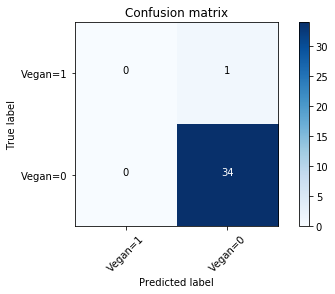

In [23]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Vegan=1','Vegan=0'],normalize= False,  title='Confusion matrix')

- Apparently out of 35 neighborhoods, the "vegan" value of 34 of them is 0 and the model correctly predicted all 34 of them. Nevertheless the success of the model can also be quite precisely reflected on precision, recall and f1-scores.

In [24]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.00      0.00      0.00         1

    accuracy                           0.97        35
   macro avg       0.49      0.50      0.49        35
weighted avg       0.94      0.97      0.96        35



/home/fermat4472/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## D.Discussion

Needless to say, classification techniques are quintessential for data science. Logistic regression is a very useful tool to predict categorical outcomes. One needs to underline the fact that the outcome of a model is only strong and reliable as the the data set. The selection of independent variables are of key importance. Multicollinearity risk should be kept in mind. During this study I personally observed that unless the independent variables are not truly independent of each other, the results could be meaningless.  

The open source data used for neighborhood boundaries and neighborhood profiles are not dynamic hence the outcome could be erroneous when faced with real-time realities.

## E.Conclusion

Plant-based diets are gaining popularity as more and more people are inclined to be more ethically and environmentally conscious. Investing in a vegan restaurant may not be the best option economically yet but it is certainly a step in the right direction for the globe.

## F.References

[1] https://www.statista.com/statistics/937738/consumer-attitudes-towards-reducing-meat-consumption/

[2] https://www.statista.com/statistics/954924/number-of-vegetarians-and-vegans-canada/

[3] https://developer.foursquare.com/

[4] https://open.toronto.ca/dataset/neighbourhoods/

[5] https://open.toronto.ca/dataset/neighbourhood-profiles/

[6] For a detailed discussion on which solver would suit the need, please see:

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406